In [9]:
import pandas as pd
from konlpy.tag import Kkma
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
df = pd.read_csv('result/잼페이스.csv')

In [11]:
kkma = Kkma()

In [12]:
df

,name,ratings,date,helpful,comment,developer_comment
0,Seohyeon Kim,5,2020-04-25,22,정말 오랫동안 잼페이스를 사용해온 유접니다 일단 자신의 얼굴의 따라 메이크업을할수있...,NaN
1,차승민,1,2020-04-30,10,리뷰가 없어져서 다시쓰네요 제가 젬페이스로 뷰튜버들 화장영상 보면서 따라하고 타임점...,NaN
2,박소민,3,2020-05-01,9,"저 진짜 안좋은 말만 안하고싶은데ㅠㅠ 하나만 말할게요,,,어제 타임점프이벤트가 끝났...",ZAMFACE2020년 5월 5일소민님!! 타임점프 100% 달성하셨나요? +_+...
3,su jin kim,5,2020-05-05,0,굳이 유튭에서 스킵 안눌러도 되는게 좋아여. 바로바로 메이크업 단계별로 넘어갈 수 ...,"ZAMFACE2020년 5월 6일su jin kim 님, 감사합니다😊 ! 앞으로도 ..."
4,유자 「#자몽이들사랑해요」,5,2020-04-28,1,화장하는 영상과 화장품까지 자세히 모아나서 괭장히 화장에 도움이됀다 초보자매이크업을...,NaN
...,...,...,...,...,...,...
195,임예진,5,2020-01-13,0,저는 광고로 앱을 다운 받았는데 뷰티에 관심이 많은신 분들이라면 추천하고싶어요!😄 ...,NaN
196,고경녕,5,2020-02-06,0,이 앱으로 저에게 맞는 여러가지 화장방법과 화장품을 볼수 있으니 완전 좋아요!,NaN
197,으능,5,2019-12-05,1,정말 이벤트도 다양하고 무엇보다 영상에 쓰인 제품이 자세하게 표시되어있는게 너무 좋...,NaN
198,허지윤,5,2020-02-12,0,뷰티 관련 지식을 업그레이드 해주는데 최적화된 앱,NaN


In [17]:
#sentences = kkma.sentences(df['comment'])
#[kkma.nonus(comment) for comment in df['comment']]

In [16]:
nouns = [kkma.nouns(comment) for comment in df['comment']]

In [18]:
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
print(words)

[['오랫동안', '잼', '잼페이스', '페이스', '유', '자신', '얼굴', '메이크업', '수', '뷰티', '제품', '나', '이벤트'], ['리뷰', '제가', '젬', '젬페이스', '페이스', '뷰', '뷰튜버들', '튜', '버들', '화장', '화장영상', '영상', '타임', '타임점프', '점프', '유용', '앱', '스탬프', '스탬프방', '방', '이벤트', '응모', '친구', '소개', '얼굴', '얼굴매칭', '매칭', '신기', '신기하다', '하다', '저희', '오류', '실패', '다음', '시도', '참여', '처음', '유저', '만', '수', '4', '4명', '명', '시간', '기회', '성공', '때', '이상', '방식', '상심', 'ㅜ'], ['저', '말', '하나', '어제', '타임', '타임점프이벤트', '점프', '이벤트', '20', '영', '영1', '1', '원권', '당첨', '제품', '안', '거', '거여', '여', '올', '올영', '연락처', '주소', '수정', '이것'], ['유튭', '스킵', '안', '여', '메이크업', '단계별', '수', '있응', '거', '때', '시간', '시간절약', '절약'], ['화장', '영상', '화장품', '나', '괭', '도움', '초보자', '초보자매이크업', '매이', '크업'], ['자기', '자신', '뷰튜버', '타임', '타임점프', '점프', '기능'], ['말', '이런앱', '예전', '썻으', '터', '점', '하나', '여', '강추', '강추강추'], ['앱', '시청', '영상', '반복', '일시', '일시정지', '정지', '현상', '창', '접속', '재생', '일', '발생', '버튼', '처음', '시도', '자체', '수', '정', '정도로', '도로', '이', '부분', '수정', '부탁'], ['화장', '유', '유튜브', '튜브', '검색', '뷰티', '뷰티영상', '

In [19]:
count = [Counter(word) for word in words]

In [20]:
most = [count.most_common(100) for count in count]
tags = {}
for n in most:
    for j,v in n:
        tags[j] = v

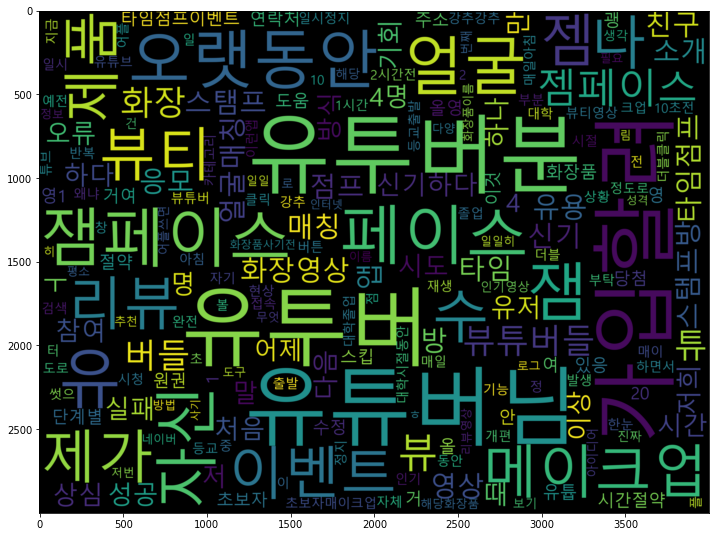

In [21]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',width=2000,height=1500,
              scale=2.0, max_font_size=250)

gen = wc.generate_from_frequencies(tags)
plt.figure(figsize=(12,10))
plt.imshow(gen, interpolation = 'bilinear')
wc.to_file("잼.png")
plt.show()